In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/Electric_Production.csv")

In [3]:
print(df.head(5))
print(df.tail(5))
print(df.describe())

       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
          DATE  IPG2211A2N
392   9/1/2017     98.6154
393  10/1/2017     93.6137
394  11/1/2017     97.3359
395  12/1/2017    114.7212
396   1/1/2018    129.4048
       IPG2211A2N
count  397.000000
mean    88.847218
std     15.387834
min     55.315100
25%     77.105200
50%     89.779500
75%    100.524400
max    129.404800


In [4]:
print(df.shape)
print(df.info())

(397, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


In [5]:
# handling missing values if any 

df = df.rename(columns={"IPG2211A2N":"temp"})
df.head(5)

,DATE,temp
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
#finding the value of d

from statsmodels.tsa.stattools import adfuller 

result = adfuller(df.temp.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF statistic: -2.25699035004725
p-value: 0.18621469116586592


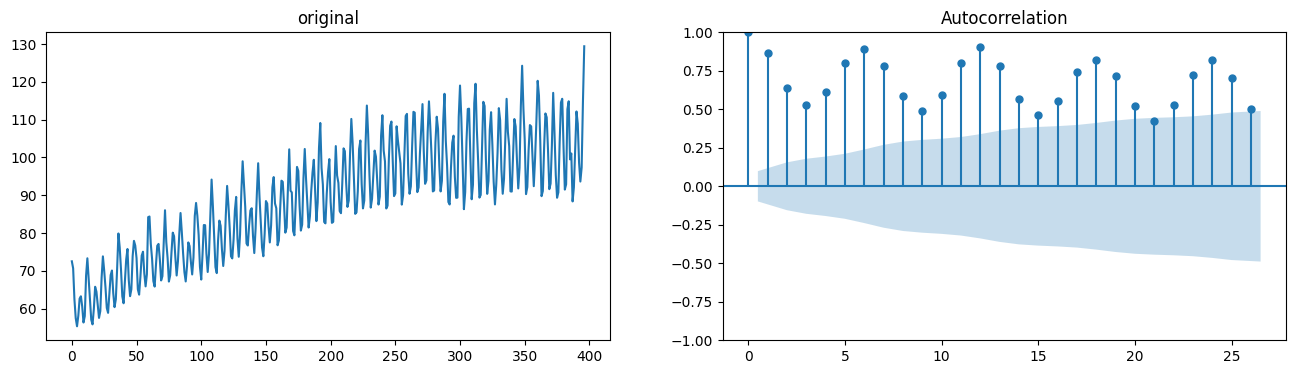

In [7]:
# value of p not less than 0.05 so we find the d value using number of differentiatrion

from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.temp)
ax1.set_title("original")

plot_acf(df.temp , ax=ax2); #adding ; at the end so that the plots are not duplicated 

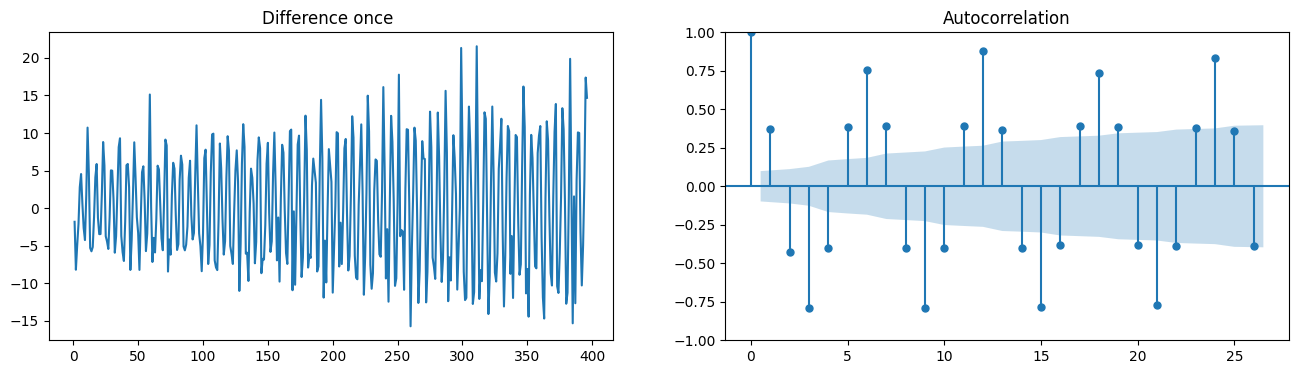

In [8]:
#now we have the d value of 1
#now we should find the value of p using partial auto correlation

from statsmodels.graphics.tsaplots import plot_pacf

diff = df.temp.diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once ")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

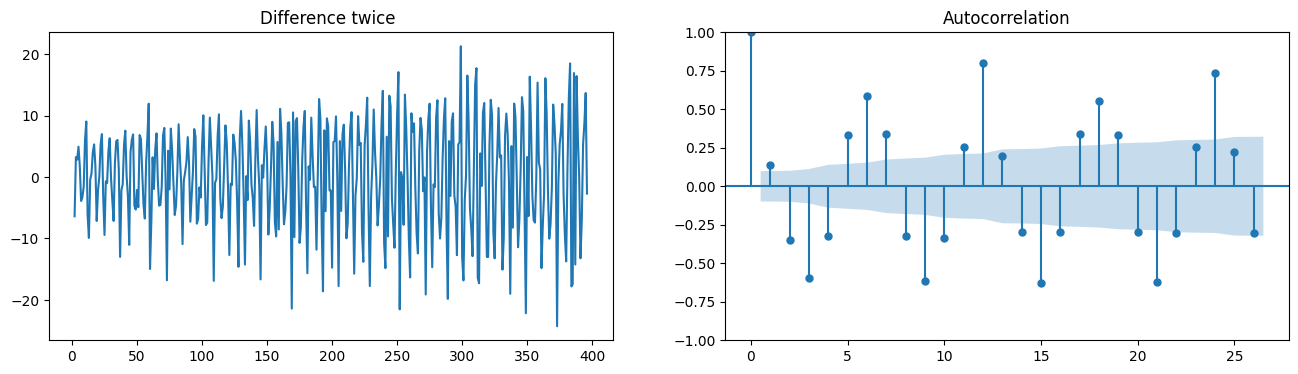

In [9]:
diff = df.temp.diff().diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice ")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [10]:
#to directly find the order of differenc d?
from statsmodels.tsa.stattools import adfuller

def adf_test(series, significance=0.05):
    """Returns the minimum differencing order needed for stationarity"""
    d = 0
    p_value = adfuller(series)[1]  # Get p-value from ADF test
    while p_value > significance:
        d += 1
        series = series.diff().dropna()  # Differencing
        p_value = adfuller(series)[1]  # Recalculate p-value
    return d

# Example usage:
d_value = adf_test(df['temp'])
print(f"Recommended differencing order (d): {d_value}")

Recommended differencing order (d): 1


In [11]:
!pip install pipenv
!pipenv install pmdarima

To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing pmdarima...
Installation Succeeded
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing dependencies from Pipfile.lock (df0d56)...


c:\users\spide\appdata\local\temp\pipenv-w7jhq1ej-requirements\pipenv-vsze6cwa-
hashed-reqs.txt (line 1))
  Using cached Cython-3.0.12-cp313-cp313-win_amd64.whl (2.8 MB)
c:\users\spide\appdata\local\temp\pipenv-w7jhq1ej-requirements\pipenv-vsze6cwa-
hashed-reqs.txt (line 2))
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
c:\users\spide\appdata\local\temp\pipenv-w7jhq1ej-requirements\pipenv-vsze6cwa-
hashed-reqs.txt (line 3))
  Using cached numpy-2.2.3-cp313-cp313-win_amd64.whl (12.6 MB)
c:\users\spide\appdata\local\temp\pipenv-w7jhq1ej-requirements\pipenv-vsze6cwa-
hashed-reqs.txt (line 4))
  Using cached packaging-24.2-py3-none-any.whl (65 kB)
c:\users\spide\appdata\local\temp\pipenv-w7jhq1ej-requirements\pipenv-vsze6cwa-
hashed-reqs.txt (line 5))
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
c:\users\spide\appdata\local\temp\pipenv-w7jhq1ej-requirements\pipenv-vsze6cwa-
hashed-reqs.txt (line 6))
  Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
c:\user

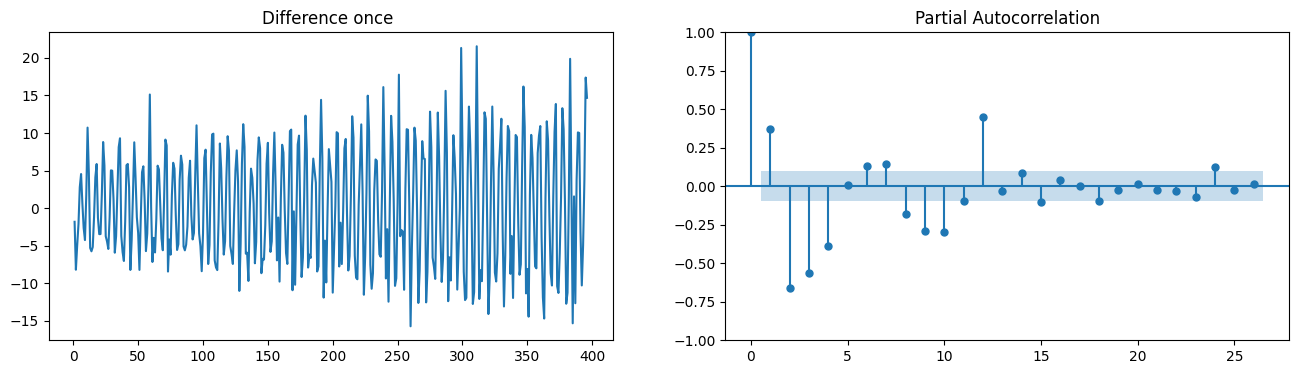

In [12]:
#  now lets find the value of p using partial autocorrelation
diff = df.temp.diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once ")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

now we take the p value as 12 because it stands above the significance line 

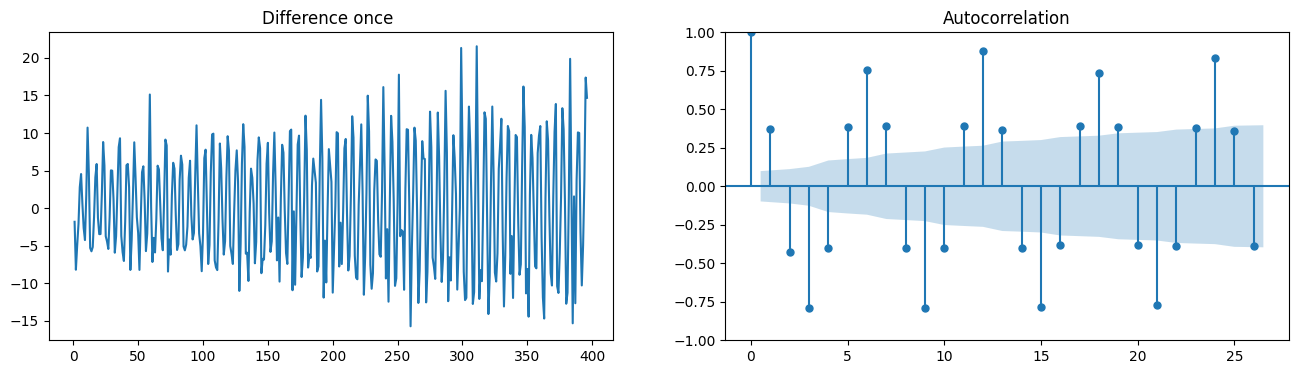

In [13]:
# q  is the order of the moving average 
diff = df.temp.diff().dropna()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once ")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

we take the q value as 6 
corresponding values of pdq are
p=12
d=1
q=6

In [14]:
#fitting the ARIMA model 

from statsmodels.tsa.arima.model import ARIMA

#12,1,6

model = ARIMA(df['temp'], order=(12, 1, 6))
result = model.fit()


C:\Users\spide\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\spide\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  397
Model:                ARIMA(12, 1, 6)   Log Likelihood                -952.821
Date:                Thu, 13 Mar 2025   AIC                           1943.642
Time:                        21:21:51   BIC                           2019.289
Sample:                             0   HQIC                          1973.611
                                - 397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0701      0.326     -0.215      0.830      -0.710       0.570
ar.L2          0.0882      0.344      0.257      0.797      -0.586       0.762
ar.L3         -0.2668      0.275     -0.971      0.3

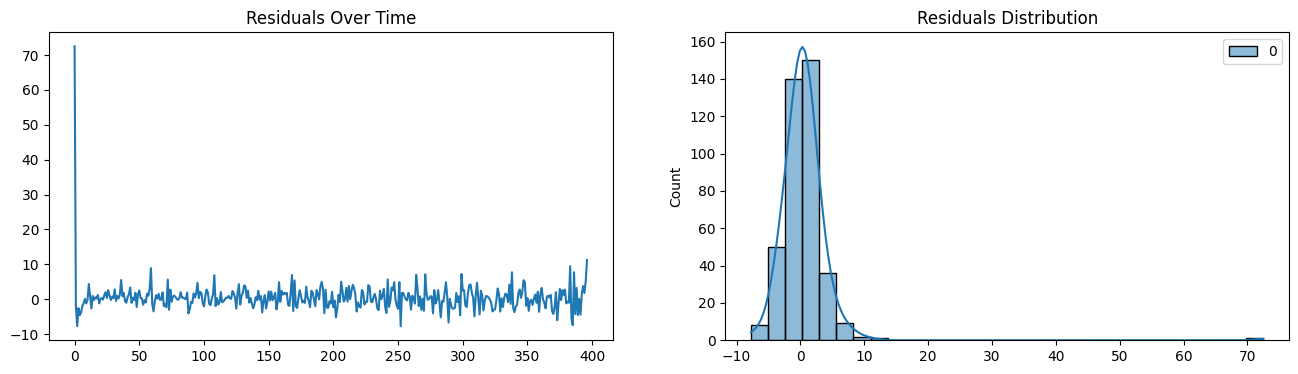

In [16]:
# Get residuals
residuals = pd.DataFrame(result.resid)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot residuals over time
ax1.plot(residuals)
ax1.set_title("Residuals Over Time")

# Plot histogram with density curve
sns.histplot(residuals, bins=30, kde=True, ax=ax2)
ax2.set_title("Residuals Distribution")

plt.show()

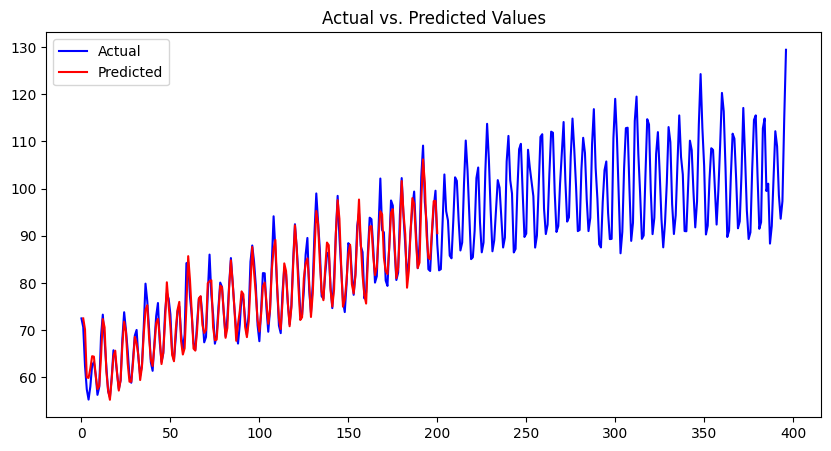

In [17]:
# Define forecast range
import matplotlib.pyplot as plt

# Generate predictions
forecast = result.predict(start=1, end=200, dynamic=False)

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(df['temp'], label="Actual", color="blue")  # Actual data
plt.plot(range(1, 201), forecast, label="Predicted", color="red")  # Forecasted values
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.show()

# so if we look at the graph  what the actualvalues tell and our predicted values amost match and they are nearly the same so our model is working well
# now lets foecast the future predictions

In [18]:
import joblib

# Save the model
joblib.dump(result, 'arima_model.pkl')

['arima_model.pkl']